<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/CryptoWorkoutWeek9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycrypto # DES 사용을 위해 암호화 library를 설치합니다

import cv2
import matplotlib.pyplot as plt
import numpy as np
from Crypto.Cipher import DES
from Crypto import Random

# 1. cv2 함수 설명 (이미지 파일을 불러올때 이용합니다.)

(1) cv2.imread(file_name) : 입력된 경로(file_name)에 있는 이미지 파일을 열어서 행렬(numpy array)로 저장합니다. 열린 파일은 컬러 이미지라면 BGR 형식으로 저장됩니다.

(2) cv2.cvtColor(img, cv2.COLOR_BGR2RGB) : 이미지 파일 img를 BGR형식에서 RGB형식으로 바꿔줍니다.

(3) cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) : 이미지 파일 img를 BGR형식에서 Gray형식 (흑백)으로 바꿔줍니다.

주의: *Colab 왼쪽의 파일 탭을 이용해서 이미지 화일(emti.png)을 업로드 한 후, 실행해야 합니다.*

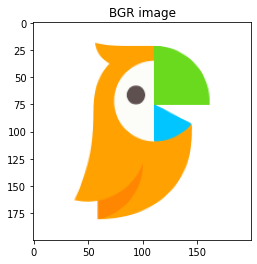

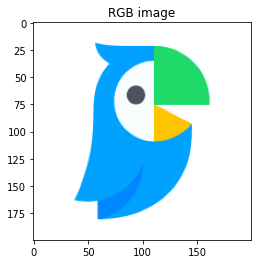

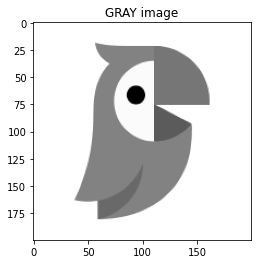

In [ ]:
# (1) 예제
filename = './emti.png'
my_img = cv2.imread(filename) ## cv2 use BGR
plt.imshow(my_img)
plt.title('BGR image')
plt.show()

# (2) 예제
my_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2RGB) # BGR -> RGB
plt.imshow(my_img)
plt.title('RGB image')
plt.show()
# print()
# plt.imshow(my_img[:,:,0]) # R
# plt.show()
# plt.imshow(my_img[:,:,1]) # G
# plt.show()
# plt.imshow(my_img[:,:,2]) # B
# plt.show()

# (3) 예제
gray_img = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY) # BGR -> GRAY
plt.imshow(gray_img, cmap = 'gray')
plt.title('GRAY image')
plt.show()

# 2. DES (ECB mode) 암호화 & 복호화 (컬러 또는 흑백 이미지를 암호화, 복호화)
(1) Array.reshape((size)) : numpy array 타입의 Array의 사이즈를 size로 변형시킵니다.

(2) Array.tolist() : numpy array 타입의 Array를 list 타입으로 변형시킵니다.

(3) np.moveaxis(Array, a, b) : numpy array인 Array의 a번째 축(axis)를 b번째 축과 자리이동합니다.

(4) bytes() : 입력값을 bite로 바꿔줍니다.

(5) DES.new(key, DES.MODE_ECB, iv) : DES 모듈. key와 mode를 설정합니다.
- iv는 암호화에 이용될 초기화 벡터입니다. ECB mode에서 iv는 이용되지않습니다.

(6) cipher.encrypt(P) : (5)에서 정의한 암호화 모듈 cipher을 이용하여 메세지 P를 암호화합니다.

(7) cipher.decrypt(C) : (5)에서 정의한 암호화 모듈 cipher을 이용하여 암호화된 메세지 C를 복호화합니다.

참고한 사이트

- https://www.dlitz.net/software/pycrypto/api/2.6/Crypto.Cipher.DES-module.html

- https://legrandin.github.io/pycryptodome/Doc/3.4/Crypto.Cipher._mode_cbc.CbcMode-class.html#encrypt

In [ ]:
A = np.arange(24)
print('A =', A)
print('shape of A :', A.shape)
print('')

# (1) 예제
B = A.reshape((2,3,4))
print('B =')
print(B)
print('shape of B :', B.shape)
print('')

# (2) 예제
C = B.tolist()
print('C =', C)
print('')
# list는 shape 함수를 쓸수없다.

# (3) 예제
BB = np.moveaxis(B, 0, 2)
print('BB =')
print(BB)
print('shape of BB :', BB.shape)
print('')

# (4) 예제
D = bytes([1, 2, 3])
print('D =', D)
print('D를 list로 되돌리기', list(D))


A = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
shape of A : (24,)

B =
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
shape of B : (2, 3, 4)

C = [[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]], [[12, 13, 14, 15], [16, 17, 18, 19], [20, 21, 22, 23]]]

BB =
[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
shape of BB : (3, 4, 2)

D = b'\x01\x02\x03'
D를 list로 되돌리기 [1, 2, 3]


In [ ]:
# DES ECB mode 암호화 함수
def DES_ECB_encrypt(img, key, show_img = True):
  # img : array type image matrix.
  # key : length 8 string.
  # show_img : True or False, True= show before and after the image.
  cipher = DES.new(key, DES.MODE_ECB)

  x, y = img.shape[:2]
  _img = []
  if len(img.shape) == 3:
    if img.shape[2] == 3: # color image
      _img = [img[:,:,0].reshape((x*y,)).tolist(),#R
              img[:,:,1].reshape((x*y,)).tolist(),#G
              img[:,:,2].reshape((x*y,)).tolist()]#B
  else: # [data dim != 3 -> (x, y)] or [data dim = 3 but gray image -> (x, y, 1)]
    _img = [img.reshape((x*y,)).tolist()]


  if (x*y % 8) != 0:
    for i in range(len(_img)): #len(_img) = 3 or 1
      for _ in range(8 - (x*y % 8)):
        _img[i].append(0)

  result = []
  for i in range(len(_img)):
    enc = []
    for j in range(len(_img[0])//8):
      P = bytes(_img[i][8*j : 8*j+8]) # list to bytes
      enc +=  list(cipher.encrypt(P)) # encrypt and change bytes to list
    result.append(enc)
  result = np.array(result)

  if  len(_img) == 1: #gray
    result = result[0]
  else: # RGB
    result = np.moveaxis(result, 0, -1) # shape of result = (3,x*y) -> (x*y,3)

  if show_img == True:
    fig, axes = plt.subplots(1,2)
    ax = axes.flatten()
    ax[0].set_title('original img')
    ax[1].set_title('des ecb encrypt img')
    if len(_img) == 1:
      ax[0].imshow(img, cmap="gray")
      ax[1].imshow(result[:x*y].reshape((x,y)), cmap="gray")
    else:
      ax[0].imshow(img)
      ax[1].imshow(result[:x*y].reshape((x,y,3)))
    plt.show()
  return result, [x,y]

# DES ECB mode 복호화 함수
def DES_ECB_decrypt(ciphertext, ori_shape, key, show_img = True):
  # ciphertext : array type cipher matrix.
  # key : length 8 string.
  # ori_shape : shape of original img, need x and y.
  # show_img : True or False, True= show before and after the image.
  cipher = DES.new(key, DES.MODE_ECB)

  x, y= ori_shape

  _text = []
  if len(ciphertext.shape) == 2:
    if ciphertext.shape[1] == 3: # color image
      _text = [ciphertext[:,0].tolist(),#R
              ciphertext[:,1].tolist(),#G
              ciphertext[:,2].tolist()]#B
  else: # [data dim != 2 -> (x*y, )  ]or  [data dim = 2 but gray image -> (x*y, 1)]
    _text = [ciphertext.tolist()]

  result = []
  for i in range(len(_text)):
    dec = []
    for j in range(len(_text[0])//8):
      C = bytes(_text[i][8*j : 8*j+8]) # list to bytes
      dec +=  list(cipher.decrypt(C)) # encrypt and change bytes to list
    result.append(dec)
  result = np.array(result)[:,:x*y].reshape((len(_text),x,y))

  if  len(_text) == 1: #gray
    result = result[0]
  else: # RGB
    result = np.moveaxis(result, 0, -1) # shape of result = (3,x*y) -> (x*y,3)

  if show_img == True:
    fig, axes = plt.subplots(1,2)
    ax = axes.flatten()
    ax[0].set_title('cipher img')
    ax[1].set_title('des ecb decrypt img')
    if len(_text) == 1:
      ax[0].imshow(ciphertext[:x*y].reshape((x,y)), cmap="gray")
      ax[1].imshow(result, cmap="gray")
    else:
      ax[0].imshow(ciphertext[:x*y].reshape((x,y,3)))
      ax[1].imshow(result)
    plt.show()
  return result

# DES ECB mode 적용해보기

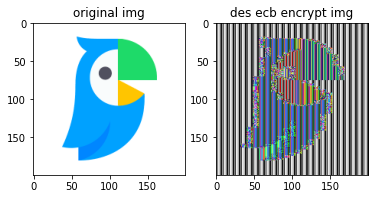

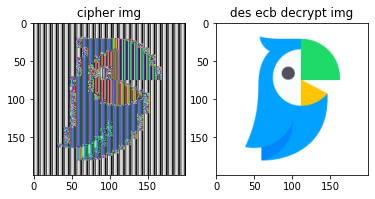

In [ ]:
img = cv2.imread(filename)#read image

img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 컬러 이미지
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 흑백 이미지

key = b'des keys'

des_ecb_enc = DES_ECB_encrypt(img = img, key = key, show_img = True)
print('')
des_ecb_dec = DES_ECB_decrypt(des_ecb_enc[0], des_ecb_enc[1], key, show_img = True)

# 3. DES CBC mode

In [ ]:
def DES_CBC_encrypt(img, key, iv, show_img = True):
  # img : array type image matrix.
  # key : length 8 string.
  # iv : The initialization vector to use for encryption or decryption.
  # show_img : True or False, True= show before and after the image.
  cipher = DES.new(key, DES.MODE_CBC, iv)

  x, y= img.shape[:2]
  _img = []
  if len(img.shape) == 3:
    if img.shape[2] == 3: # color image
      _img = [img[:,:,0].reshape((x*y,)).tolist(),#R
              img[:,:,1].reshape((x*y,)).tolist(),#G
              img[:,:,2].reshape((x*y,)).tolist()]#B
  else: # [data dim != 3 -> (x, y)] or [data dim = 3 but gray image -> (x, y, 1)]
    _img = [img.reshape((x*y,)).tolist()]


  if (x*y % 8) != 0:
    for i in range(len(_img)): #len(_img) = 3 or 1
      for _ in range(8 - (x*y % 8)):
        _img[i].append(0)

  result = []
  for i in range(len(_img)):
    enc = []
    # C = iv
    for j in range(len(_img[0])//8):
      P = bytes(_img[i][8*j : 8*j+8]) # list to bytes
      enc +=  list(cipher.encrypt(P)) # encrypt and change bytes to list
    result.append(enc)
  result = np.array(result)

  if  len(_img) == 1: #gray
    result = result[0]
  else: # RGB
    result = np.moveaxis(result, 0, -1) # shape of result = (3,x*y) -> (x*y,3)

  if show_img == True:
    fig, axes = plt.subplots(1,2)
    ax = axes.flatten()
    ax[0].set_title('original img')
    ax[1].set_title('des cbc encrypt img')
    if len(_img) == 1:
      ax[0].imshow(img, cmap="gray")
      ax[1].imshow(result[:x*y].reshape((x,y)), cmap="gray")
    else:
      ax[0].imshow(img)
      ax[1].imshow(result[:x*y].reshape((x,y,3)))
    plt.show()
  return result, [x,y]


def DES_CBC_decrypt(ciphertext, ori_shape, key,iv, show_img = True):
  # ciphertext : array type cipher matrix.
  # key : length 8 string.
  # ori_shape : shape of original img, need x and y.
  # iv : The initialization vector to use for encryption or decryption.
  # show_img : True or False, True= show before and after the image.
  cipher = DES.new(key, DES.MODE_CBC, iv)

  x, y = ori_shape

  _text = []
  if len(ciphertext.shape) == 2:
    if ciphertext.shape[1] == 3: # color image
      _text = [ciphertext[:,0].tolist(),#R
              ciphertext[:,1].tolist(),#G
              ciphertext[:,2].tolist()]#B
  else: # [data dim != 2 -> (x*y, )  ]or  [data dim = 2 but gray image -> (x*y, 1)]
    _text = [ciphertext.tolist()]

  result = []
  for i in range(len(_text)):
    dec = []
    for j in range(len(_text[0])//8):
      P = bytes(_text[i][8*j : 8*j+8]) # list to bytes
      dec +=  list(cipher.decrypt(P)) # encrypt and change bytes to list
    result.append(dec)
  result = np.array(result)[:,:x*y].reshape((len(_text),x,y))

  if  len(_text) == 1: #gray
    result = result[0]
  else: # RGB
    result = np.moveaxis(result, 0, -1) # shape of result = (3,x*y) -> (x*y,3)

  if show_img == True:
    fig, axes = plt.subplots(1,2)
    ax = axes.flatten()
    ax[0].set_title('cipher img')
    ax[1].set_title('des cbc decrypt img')
    if len(_text) == 1:
      ax[0].imshow(ciphertext[:x*y].reshape((x,y)), cmap="gray")
      ax[1].imshow(result, cmap="gray")
    else:
      ax[0].imshow(ciphertext[:x*y].reshape((x,y,3)))
      ax[1].imshow(result)
    plt.show()
  return result

# DES CBC mode 적용해보기

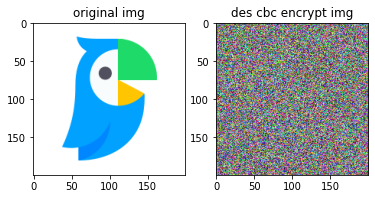

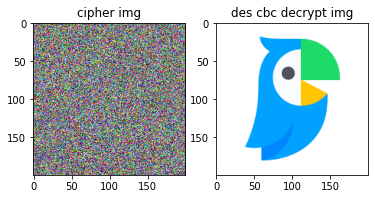

In [ ]:
img = cv2.imread(filename)#read image

img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

key = b'des keys'
iv =  b'00000000' #Random.new().read(DES.block_size)

des_cbc_enc = DES_CBC_encrypt(img = img, key = key, iv = iv, show_img = True)
print('')
des_cbc_dec = DES_CBC_decrypt(des_cbc_enc[0], des_cbc_enc[1], key = key, iv = iv, show_img = True)

# 4. 이미지 저장

In [ ]:
# DES ECB mode를 이용하여 암호화한 이미지 저장
save_img1 = cv2.cvtColor(np.array(des_ecb_enc[0][:des_ecb_enc[1][0]*des_ecb_enc[1][1]].reshape((des_ecb_enc[1][0],des_ecb_enc[1][1],3)), dtype=np.uint8), cv2.COLOR_RGB2BGR)
cv2.imwrite('1_des_ecb_enc.jpg', save_img1)

True

In [ ]:
# DES ECB mode를 이용하여 복호화한 이미지 저장
save_img2 = cv2.cvtColor(np.array(des_ecb_dec, dtype=np.uint8), cv2.COLOR_RGB2BGR)
cv2.imwrite('2_des_ecb_dec.jpg', save_img2)

True

In [ ]:
# DES CBC mode를 이용하여 암호화한 이미지 저장
save_img3 = cv2.cvtColor(np.array(des_cbc_enc[0][:des_cbc_enc[1][0]*des_cbc_enc[1][1]].reshape((des_cbc_enc[1][0],des_cbc_enc[1][1],3)), dtype=np.uint8), cv2.COLOR_RGB2BGR)
cv2.imwrite('3_des_cbc_enc.jpg', save_img3)

True

In [ ]:
# DES CBC mode를 이용하여 복호화한 이미지 저장
save_img4 = cv2.cvtColor(np.array(des_cbc_dec, dtype=np.uint8), cv2.COLOR_RGB2BGR)
cv2.imwrite('4_des_cbc_dec.jpg', save_img4)

True

## 실습문제 1
위의 코드를 이용하여 각자 자신의 이미지를 DES ECB 모드와 CBC 모드로 암호화/복호화한 후, 그 이미지를 제출하세요.

## 실습문제 2

1. $f(x)$를 binary strings에서 binary strings로 가는 함수라 할때, 만약 다음을 만족시키면 *equal difference property*를 갖고 있다고 말한다: 
$$
x_1 \oplus x_2 = x_3 \oplus x_4 \Longrightarrow f(x_1)\oplus f(x_2) = f(x_3)\oplus f(x_4)
$$
$\alpha, \beta \in GF(2^8)$에 대해, $f(x) = \alpha x + \beta$가 *equal difference property*를 갖음을 보여라.

2. 
$x_1=00000000, x_2 = 00000001, x_3 = 00000010, x_4 = 00000011$라 하자. $BS(x)$는 $x$의 ByteSub 변환이라 할 때, 
$$
BS(x_1)\oplus BS(x_2) = 00011111 \ne 00001100 = BS(x_3) \oplus BS(x_4)
$$ 
임을 보여라. 즉, ByteSub 변환은 *equal difference property*를 갖지 않는다.


In [ ]:
format(99,'b')


'1100011'

In [ ]:
format(124,'b')

'1111100'

In [ ]:
format(119,'b')


'1110111'

In [ ]:
format(123,'b')


'1111011'